# Data Wrangling Homework

In the spirit of warming up for final projects, this weeks homework will be somewhat open-ended. Actually, it will more like closed-ended and open-middled...

Different doctors with different backgrounds, trained in different places, etc., might behave differently. In other words, one doctor might have various biases relative to another. We hope not, at least in critical situations, but doctors are people too.

Your job is to determine whether the 4 doctors in our data set are behaving essentially the same with respect to measuring clump thickness, bland chromatin, and diagnosis of tumor type, or whether any one of them seems to be different. 

The submission should be a pdf that makes your case as though to a boss/hospital administrator; it should make the case in enough detail to be convincing, but not in such detail that your boss will hate you. For example, one doctor-to-doctor comparison can be described in some detail, but the rest can be summarized with "Similar comparisons were made for ..."

Your final conclusion should be whether 1) everything seems okay with respect to the doctors or 2) if there are any red flags that might warrent further scrutiny.

Do the analysis with an open mind. It's not good to enter an analysis with a pre-conceived notion of what you may or may not find.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def bcd_load_clean():
    bcd = pd.read_csv('./data/breast_cancer_data.csv')
    bcd['patient_id'] = bcd['patient_id'].astype('string')
    bcd['doctor_name'] = bcd['doctor_name'].str.split().str[1]
    bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '')
    bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei'])
    
    return bcd

In [4]:
bcd = bcd_load_clean()

In [5]:
bcd = bcd.drop(labels = ['patient_id', 'cell_size_uniformity', 'cell_shape_uniformity', 
                          'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
                          'bare_nuclei', 'normal_nucleoli', 'mitoses'],
                axis = 1,             # we're selecting column - default is rows
                inplace = False)      # we could modify bcd itself with True

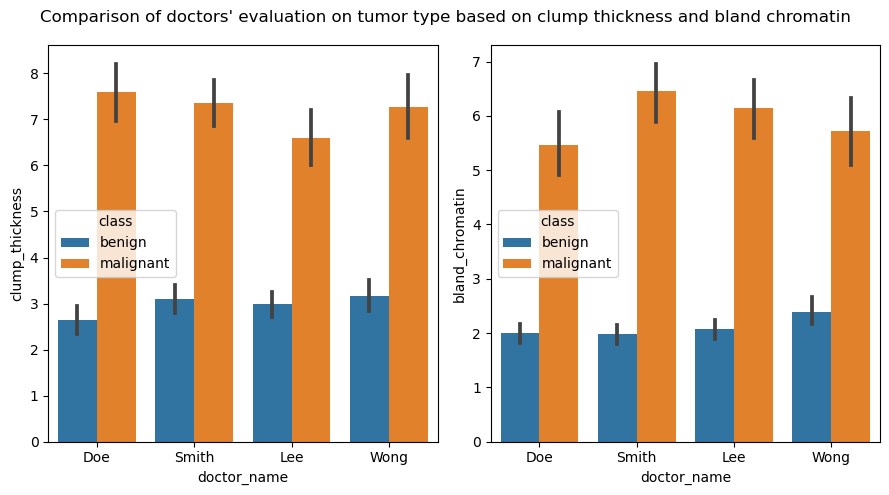

In [8]:
fig = plt.figure(figsize = (9,5))

plt.subplot(1,2,1)
sns.barplot(bcd, x = 'doctor_name', y = 'clump_thickness', hue = 'class');

plt.subplot(1,2,2)
sns.barplot(bcd, x = 'doctor_name', y = 'bland_chromatin', hue = 'class');

fig.suptitle("Comparison of doctors' evaluation on tumor type based on clump thickness and bland chromatin")
plt.tight_layout()

/Users/phoebewang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


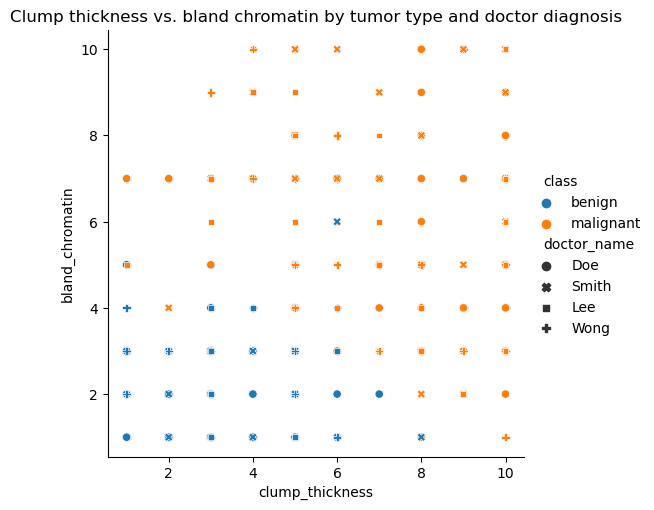

In [7]:
sns.relplot(bcd, x = "clump_thickness", y = "bland_chromatin", style = "doctor_name", hue = "class");
plt.title("Clump thickness vs. bland chromatin by tumor type and doctor diagnosis");

**Conclusion:**
---

The four doctors in our data set are behaving similarly to one another in measuring clump thickness, bland chromatin, and diagnosis of tumor type. In looking at the bar plots, the blue bars are similar in height, and the orange bars are similar in height. The error bars mostly overlapped, indicating no significant differences in the doctors’ evaluations. The bar height and error bars suggest that the four doctors mainly had consistent tumor-type diagnoses based on their clump thickness and bland chromatin assessment. However, Dr. Wong appears to have more frequently diagnosed benign tumors with larger bland chromatin around 2.3, which deviates from the three other doctors’ diagnosis of benign tumors with bland chromatin around 2.

The scatterplot supports the claim that the four doctors’ diagnoses are generally alike as they fall in the same regions of the scatterplot, indicating a similar evaluation of the relationship between clump thickness and bland chromatin and how they relate to tumor type. Nonetheless, Dr. Smith, represented by “x” on the scatterplot, diagnosed tumor types in regions where the relationship between bland chromatin and clump thickness suggests otherwise. For example, Dr. Smith diagnosed a benign tumor with clump thickness and bland chromatin at 6, while the other doctors around that region would diagnose the cancer as a malignant tumor. 


Even though some doctors may have different diagnoses from others in specific cases, the four doctors behave similarly as most of their diagnoses are consistent.